In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import scipy  as sp
import sys

In [2]:
sys.path.append('../../../../../Projects/Python/AI Techniques/NaiveBayesian/')

In [3]:
import Naive_Bayesian_Classification as nbc

In [4]:
path = 'c:/Users/byecs/Documents/GitHub/BlogWyrm/Posts/2020/July/Aristotle2Digital/'
fn   = 'Gemstone Data.txt'
attributes = ['color','scale','shape']
df   = pd.read_csv(path+fn,names=attributes+['authenticity'])

In [5]:
distinct_values     = nbc.find_distinct_values(df,attributes)
smoothed_marginals  = nbc.calculate_Laplace_smoothed_marginals(df,distinct_values)
summary             = nbc.characterize_data_set(df)

In [6]:
np.where(df['authenticity']==0)[0]

array([ 1,  2,  4,  6, 10, 15, 17, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 36, 38, 39], dtype=int64)

In [7]:
sample = ['Cyan','Small','Twisted']
nbc.calculate_evidence(distinct_values,smoothed_marginals,summary,sample)

(0.3854670113521412, 0.6145329886478589)

In [8]:
#Prepare the probabilities
Probs = {}
for attribute in distinct_values:
    attribute_value_count = df[attribute].value_counts()
    Probs[attribute] = {}
    for value in distinct_values[attribute]:
        Probs[attribute][value] = attribute_value_count[value]/summary['num samples']
        
Cum_Probs = {}
for attribute in sorted(distinct_values):
    Cum_Probs[attribute] = {}
    for value in sorted(distinct_values[attribute]):
        Cum_Probs[attribute][value] = 0
for attribute in sorted(distinct_values):
    for value in sorted(distinct_values[attribute]):
        for second_value in sorted(distinct_values[attribute]):
            if second_value <= value:
                Cum_Probs[attribute][value] += Probs[attribute][second_value]

a_probs = [0.91,0.20,0.79,0.14,0.77,0.34,0.35,0.44,0.49,0.71,0.75,0.33,0.53,0.24,0.86,0.42,0.26,0.96,0.92,0.58,0.18,0.58,0.06,0.08]
authenticity_probs = {}
N = 0
for color in distinct_values['color']:
    for scale in distinct_values['scale']:
        for shape in distinct_values['shape']:
            key  = '{}-{}-{}'.format(color,scale,shape)
#            prob = np.random.random() 
#            authenticity_probs[key] = float('{:0.2f}'.format(prob))
            authenticity_probs[key] = a_probs[N]
            N += 1

In [9]:
print(Probs)
print()
print(Cum_Probs)
print()
print(authenticity_probs)

{'color': {'Blue': 0.125, 'Aqua': 0.225, 'Dune': 0.5, 'Cyan': 0.15}, 'scale': {'Small': 0.775, 'Large': 0.225}, 'shape': {'Rounded': 0.675, 'Twisted': 0.15, 'Pointed': 0.175}}

{'color': {'Aqua': 0.225, 'Blue': 0.35, 'Cyan': 0.5, 'Dune': 1.0}, 'scale': {'Large': 0.225, 'Small': 1.0}, 'shape': {'Pointed': 0.175, 'Rounded': 0.8500000000000001, 'Twisted': 1.0}}

{'Blue-Small-Rounded': 0.91, 'Blue-Small-Twisted': 0.2, 'Blue-Small-Pointed': 0.79, 'Blue-Large-Rounded': 0.14, 'Blue-Large-Twisted': 0.77, 'Blue-Large-Pointed': 0.34, 'Aqua-Small-Rounded': 0.35, 'Aqua-Small-Twisted': 0.44, 'Aqua-Small-Pointed': 0.49, 'Aqua-Large-Rounded': 0.71, 'Aqua-Large-Twisted': 0.75, 'Aqua-Large-Pointed': 0.33, 'Dune-Small-Rounded': 0.53, 'Dune-Small-Twisted': 0.24, 'Dune-Small-Pointed': 0.86, 'Dune-Large-Rounded': 0.42, 'Dune-Large-Twisted': 0.26, 'Dune-Large-Pointed': 0.96, 'Cyan-Small-Rounded': 0.92, 'Cyan-Small-Twisted': 0.58, 'Cyan-Small-Pointed': 0.18, 'Cyan-Large-Rounded': 0.58, 'Cyan-Large-Twisted': 

In [10]:
for color in distinct_values['color']:
    for scale in distinct_values['scale']:
        for shape in distinct_values['shape']:
            print(color,scale,shape,Probs['color'][color]*Probs['scale'][scale]*Probs['shape'][shape])

Blue Small Rounded 0.06539062500000001
Blue Small Twisted 0.014531249999999999
Blue Small Pointed 0.016953125
Blue Large Rounded 0.018984375
Blue Large Twisted 0.00421875
Blue Large Pointed 0.004921875
Aqua Small Rounded 0.117703125
Aqua Small Twisted 0.02615625
Aqua Small Pointed 0.030515624999999998
Aqua Large Rounded 0.034171875000000004
Aqua Large Twisted 0.00759375
Aqua Large Pointed 0.008859375
Dune Small Rounded 0.26156250000000003
Dune Small Twisted 0.058124999999999996
Dune Small Pointed 0.0678125
Dune Large Rounded 0.0759375
Dune Large Twisted 0.016875
Dune Large Pointed 0.0196875
Cyan Small Rounded 0.07846875
Cyan Small Twisted 0.017437499999999998
Cyan Small Pointed 0.020343749999999997
Cyan Large Rounded 0.022781250000000003
Cyan Large Twisted 0.0050625
Cyan Large Pointed 0.00590625


In [11]:
def gem_factory(distinct_values,Cum_Probs):
    import numpy as np

    sample_list = []
    for attribute in sorted(distinct_values):
        rand_num = np.random.random()
        flag     = 0
        for value in sorted(distinct_values[attribute]):
            if rand_num <= Cum_Probs[attribute][value] and flag == 0:
                sample_list.append(value)
                flag = 1

    return sample_list

In [12]:
def create_gem_dataset(N,distinct_values,Cum_Probs,authenticity_Probs,fn):
    fh = open(fn,"w")
    for n in range(N):
        sample_list = gem_factory(distinct_values,Cum_Probs)
        key         = sample_list[0]+'-'+sample_list[1]+'-'+sample_list[2]
        if authenticity_Probs[key] < np.random.random():
            fh.write(sample_list[0]+','+sample_list[1]+','+sample_list[2]+','+'0\n')
        else:
            fh.write(sample_list[0]+','+sample_list[1]+','+sample_list[2]+','+'1\n')
    fh.close()    

In [63]:
num_samples = 40000
create_gem_dataset(num_samples,distinct_values,Cum_Probs,authenticity_probs,path+'Gemstone_2000_Dataset.txt')

In [64]:
path = 'c:/Users/byecs/Documents/GitHub/BlogWyrm/Posts/2020/July/Aristotle2Digital/'
fn   = 'Gemstone_2000_Dataset.txt'
attributes = ['color','scale','shape']
df_temp    = pd.read_csv(path+fn,names=attributes+['authenticity'])

In [65]:
distinct_values_temp     = nbc.find_distinct_values(df_temp,attributes)
smoothed_marginals_temp  = nbc.calculate_Laplace_smoothed_marginals(df_temp,distinct_values_temp)
summary_temp             = nbc.characterize_data_set(df_temp)
Probs_temp               = {}
for attribute in distinct_values_temp:
    attribute_value_count = df_temp[attribute].value_counts()
    Probs_temp[attribute] = {}
    for value in distinct_values[attribute]:
        Probs_temp[attribute][value] = attribute_value_count[value]/summary_temp['num samples']

In [66]:
print(Probs)
print()
print(Probs_temp)

{'color': {'Blue': 0.125, 'Aqua': 0.225, 'Dune': 0.5, 'Cyan': 0.15}, 'scale': {'Small': 0.775, 'Large': 0.225}, 'shape': {'Rounded': 0.675, 'Twisted': 0.15, 'Pointed': 0.175}}

{'color': {'Blue': 0.125075, 'Aqua': 0.227975, 'Dune': 0.494225, 'Cyan': 0.152725}, 'scale': {'Small': 0.7757, 'Large': 0.2243}, 'shape': {'Rounded': 0.6754, 'Twisted': 0.1513, 'Pointed': 0.1733}}


In [67]:
sample = ['Cyan','Large','Pointed']
nbc.calculate_evidence(distinct_values_temp,smoothed_marginals_temp,summary_temp,sample)

(0.3014559788620652, 0.6985440211379348)

In [68]:
authenticity_probs

{'Blue-Small-Rounded': 0.91,
 'Blue-Small-Twisted': 0.2,
 'Blue-Small-Pointed': 0.79,
 'Blue-Large-Rounded': 0.14,
 'Blue-Large-Twisted': 0.77,
 'Blue-Large-Pointed': 0.34,
 'Aqua-Small-Rounded': 0.35,
 'Aqua-Small-Twisted': 0.44,
 'Aqua-Small-Pointed': 0.49,
 'Aqua-Large-Rounded': 0.71,
 'Aqua-Large-Twisted': 0.75,
 'Aqua-Large-Pointed': 0.33,
 'Dune-Small-Rounded': 0.53,
 'Dune-Small-Twisted': 0.24,
 'Dune-Small-Pointed': 0.86,
 'Dune-Large-Rounded': 0.42,
 'Dune-Large-Twisted': 0.26,
 'Dune-Large-Pointed': 0.96,
 'Cyan-Small-Rounded': 0.92,
 'Cyan-Small-Twisted': 0.58,
 'Cyan-Small-Pointed': 0.18,
 'Cyan-Large-Rounded': 0.58,
 'Cyan-Large-Twisted': 0.06,
 'Cyan-Large-Pointed': 0.08}

In [69]:
smoothed_marginals_temp

{'Blue': array([1619, 3386]),
 'Aqua': array([5045, 4076]),
 'Dune': array([ 9277, 10494]),
 'Cyan': array([2017, 4094]),
 'Small': array([13327, 17703]),
 'Large': array([4629, 4345]),
 'Twisted': array([3979, 2075]),
 'Pointed': array([2447, 4487]),
 'Rounded': array([11531, 15487])}

In [70]:
false_evidence_weights = {}
for color in distinct_values['color']:
    for scale in distinct_values['scale']:
        for shape in distinct_values['shape']:
            sample = [color,scale,shape]
            false_evidence_weights['{}-{}-{}'.format(color,scale,shape)]=nbc.calculate_evidence(distinct_values_temp,smoothed_marginals_temp,summary_temp,sample)[0]
            print(sample,'\t',nbc.calculate_evidence(distinct_values_temp,smoothed_marginals_temp,summary_temp,sample)[0])

['Blue', 'Small', 'Rounded'] 	 0.287777836663437
['Blue', 'Small', 'Twisted'] 	 0.5099562266330332
['Blue', 'Small', 'Pointed'] 	 0.2283659983047254
['Blue', 'Large', 'Rounded'] 	 0.3637918467163922
['Blue', 'Large', 'Twisted'] 	 0.5955813392320256
['Blue', 'Large', 'Pointed'] 	 0.29519113694743765
['Aqua', 'Small', 'Rounded'] 	 0.511228371804439
['Aqua', 'Small', 'Twisted'] 	 0.7292759821104914
['Aqua', 'Small', 'Pointed'] 	 0.4337816212258303
['Aqua', 'Large', 'Rounded'] 	 0.5968069481372459
['Aqua', 'Large', 'Twisted'] 	 0.7921953379142105
['Aqua', 'Large', 'Pointed'] 	 0.520193651230946
['Dune', 'Small', 'Rounded'] 	 0.4276058553696111
['Dune', 'Small', 'Twisted'] 	 0.6580025067944931
['Dune', 'Small', 'Pointed'] 	 0.3536609360552197
['Dune', 'Large', 'Rounded'] 	 0.5139042197433545
['Dune', 'Large', 'Twisted'] 	 0.7313853206335408
['Dune', 'Large', 'Pointed'] 	 0.43641404581933946
['Cyan', 'Small', 'Rounded'] 	 0.2939509639351995
['Cyan', 'Small', 'Twisted'] 	 0.5174328190250163
[

(0, 1)

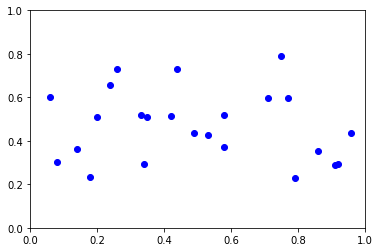

In [71]:
%matplotlib inline
real_auth    = [authenticity_probs[k] for k in sorted(authenticity_probs.keys())]
guessed_auth = [false_evidence_weights[k] for k in sorted(false_evidence_weights)]
plt.plot(real_auth,guessed_auth,'bo')
plt.xlim([0,1])
plt.ylim([0,1])

In [72]:
for k in sorted(authenticity_probs):
    print(k,authenticity_probs[k],false_evidence_weights[k])

Aqua-Large-Pointed 0.33 0.520193651230946
Aqua-Large-Rounded 0.71 0.5968069481372459
Aqua-Large-Twisted 0.75 0.7921953379142105
Aqua-Small-Pointed 0.49 0.4337816212258303
Aqua-Small-Rounded 0.35 0.511228371804439
Aqua-Small-Twisted 0.44 0.7292759821104914
Blue-Large-Pointed 0.34 0.29519113694743765
Blue-Large-Rounded 0.14 0.3637918467163922
Blue-Large-Twisted 0.77 0.5955813392320256
Blue-Small-Pointed 0.79 0.2283659983047254
Blue-Small-Rounded 0.91 0.287777836663437
Blue-Small-Twisted 0.2 0.5099562266330332
Cyan-Large-Pointed 0.08 0.3014559788620652
Cyan-Large-Rounded 0.58 0.37074675565071685
Cyan-Large-Twisted 0.06 0.602769157145401
Cyan-Small-Pointed 0.18 0.2336828313159615
Cyan-Small-Rounded 0.92 0.2939509639351995
Cyan-Small-Twisted 0.58 0.5174328190250163
Dune-Large-Pointed 0.96 0.43641404581933946
Dune-Large-Rounded 0.42 0.5139042197433545
Dune-Large-Twisted 0.26 0.7313853206335408
Dune-Small-Pointed 0.86 0.3536609360552197
Dune-Small-Rounded 0.53 0.4276058553696111
Dune-Small-Tw